**Game of thrones or shall I say Network of Thrones.**

This dataset encompasses a network  for character relationships within George R. R. Martin's  novel series  (also known as the HBO television adaptation *Game of Thrones*). This data was originally compiled by [A. Beveridge and J. Shan, "Network of Thrones," Math Horizons Magazine , Vol. 23, No. 4 (2016), pp. 18-22](https://www.maa.org/sites/default/files/pdf/Mathhorizons/NetworkofThrones%20%281%29.pdf).

If you haven't heard of Game of Thrones, then you must be really good at hiding. Game of Thrones is the hugely popular television series by HBO based on the (also) hugely popular book series A Song of Ice and Fire by George R.R. Martin. In this notebook, we will analyze the co-occurrence network of the characters in the Game of Thrones books. Here, two characters are considered to co-occur if their names appear in the vicinity of 15 words from one another in the books.

The dataset is publicly avaiable for the 5 books at https://github.com/mathbeveridge/asoiaf. This is an interaction network and were created by connecting two characters whenever their names (or nicknames) appeared within 15 words of one another in one of the books. The edge weight corresponds to the number of interactions.

**Imports**

In [0]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import community
import numpy as np

**Loading Dataset**

We will now load network data for character relationships within George R. R. Martin's  *A Storm of Swords*, the third novel in his series *A Song of Ice and Fire*.

In [1]:
! git clone https://github.com/sarahmish/network-data.git

Cloning into 'network-data'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 7 (delta 0), reused 7 (delta 0), pack-reused 0
Unpacking objects: 100% (7/7), done.


In [4]:
got_adj = pd.read_csv("network-data/game-of-thrones/got-edges.csv")
got_adj.head()

,Source,Target,Weight
0,Aemon,Grenn,5
1,Aemon,Samwell,31
2,Aerys,Jaime,18
3,Aerys,Robert,6
4,Aerys,Tyrion,5


The resulting dataframe has 3 columns: source, target, and weight. Source and target are the two nodes that are linked by an edge. The weight attribute of every edge tells us the number of interactions that the characters have had over the book.

Once we have the data loaded as a pandas DataFrame, it's time to create a network.

In [46]:
G = nx.from_pandas_edgelist(got_adj, source='Source', target='Target', edge_attr='Weight')

# view the top 3 edges within the network
list(G.edges(data='Weight'))[:3]

[('Aemon', 'Grenn', 5), ('Aemon', 'Samwell', 31), ('Aemon', 'Jon', 30)]

**Visualize the Network**

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


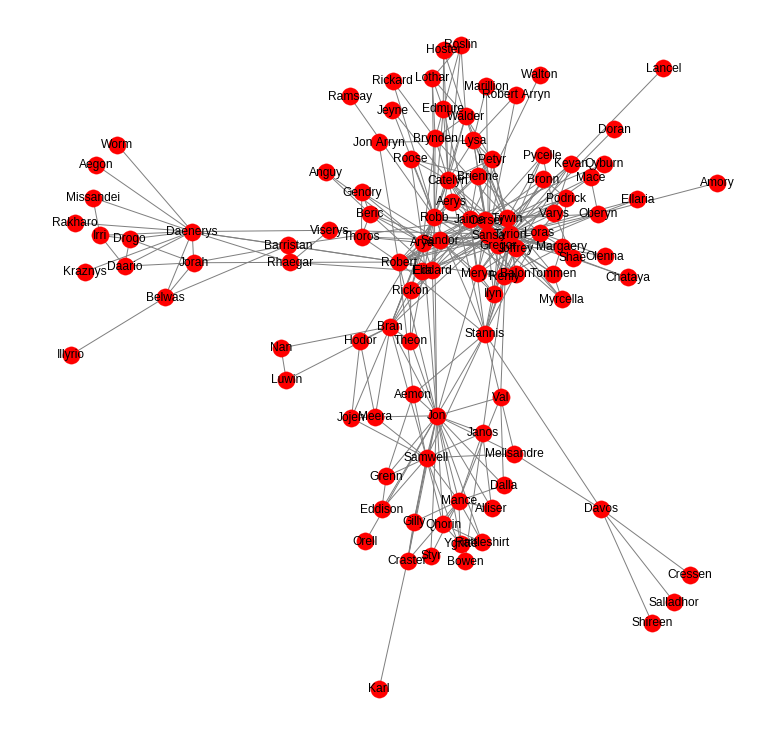

In [15]:
%matplotlib inline

fig = plt.figure(figsize=(10,10))
nx.draw(G, edge_color='grey', with_labels=True); plt.show()

**Manipulate the Network**

Graph theory is heavily dependent on linear algebra, in reality it makes adjusting the network a lot easier and cleaner to handle.

In [44]:
mx = nx.convert_matrix.to_pandas_adjacency(G, weight='Weight')
mx.head(10)

,Aemon,Grenn,Samwell,Aerys,Jaime,Robert,Tyrion,Tywin,Alliser,Mance,...,Marillion,Robert Arryn,Ellaria,Mace,Rickard,Ramsay,Chataya,Shireen,Doran,Walton
Aemon,0.0,5.0,31.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Grenn,5.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Samwell,31.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aerys,0.0,0.0,0.0,0.0,18.0,6.0,5.0,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jaime,0.0,0.0,0.0,18.0,0.0,17.0,31.0,13.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
Robert,4.0,0.0,0.0,6.0,17.0,0.0,9.0,11.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tyrion,0.0,0.0,0.0,5.0,31.0,9.0,0.0,39.0,0.0,0.0,...,0.0,0.0,4.0,9.0,0.0,0.0,5.0,0.0,5.0,0.0
Tywin,0.0,0.0,0.0,8.0,13.0,11.0,39.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
Alliser,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mance,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


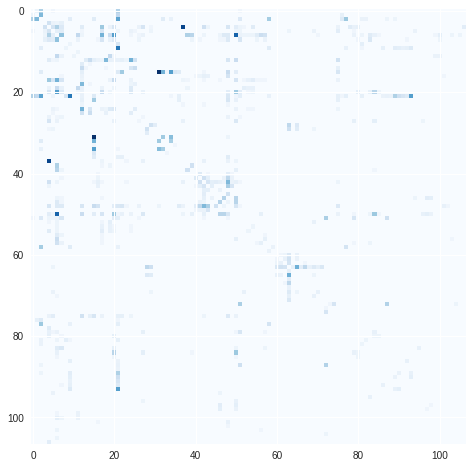

In [41]:
# visualize the adjacency matrix
%matplotlib inline

fig = plt.figure(figsize=(8,8))
plt.imshow(mx, cmap='Blues', interpolation='nearest')
plt.show()

Suppose you wrote a new script where Tyrion and Tywin were discussing some battle strategies! Now we need to update our network to reflect this new scene.

In [45]:
# increment the relationship between Tyrion and Tywin
mx.loc['Tyrion']['Tywin'] += 1
mx.loc['Tywin']['Tyrion'] += 1

mx.head(10)

,Aemon,Grenn,Samwell,Aerys,Jaime,Robert,Tyrion,Tywin,Alliser,Mance,...,Marillion,Robert Arryn,Ellaria,Mace,Rickard,Ramsay,Chataya,Shireen,Doran,Walton
Aemon,0.0,5.0,31.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Grenn,5.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Samwell,31.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aerys,0.0,0.0,0.0,0.0,18.0,6.0,5.0,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jaime,0.0,0.0,0.0,18.0,0.0,17.0,31.0,13.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
Robert,4.0,0.0,0.0,6.0,17.0,0.0,9.0,11.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tyrion,0.0,0.0,0.0,5.0,31.0,9.0,0.0,40.0,0.0,0.0,...,0.0,0.0,4.0,9.0,0.0,0.0,5.0,0.0,5.0,0.0
Tywin,0.0,0.0,0.0,8.0,13.0,11.0,40.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
Alliser,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mance,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Finding the most important node i.e character in these networks**

Is it Jon Snow, Tyrion, Daenerys, or someone else? Let's see! Network Science offers us many different metrics to measure the importance of a node in a network as we saw in the first part of the tutorial. Note that there is no "correct" way of calculating the most important node in a network, every metric has a different meaning.

First, let's measure the importance of a node in a network by looking at the number of neighbors it has, that is, the number of nodes it is connected to. For example, an influential account on Twitter, where the follower-followee relationship forms the network, is an account which has a high number of followers. This measure of importance is called degree centrality.

In [8]:
deg_cen = nx.degree_centrality(G)
sorted(deg_cen.items(), key=lambda x:x[1], reverse=True)[0:10]

[('Tyrion', 0.33962264150943394),
 ('Jon', 0.24528301886792453),
 ('Sansa', 0.24528301886792453),
 ('Robb', 0.2358490566037736),
 ('Jaime', 0.22641509433962265),
 ('Tywin', 0.20754716981132074),
 ('Cersei', 0.18867924528301885),
 ('Arya', 0.1792452830188679),
 ('Robert', 0.16981132075471697),
 ('Joffrey', 0.16981132075471697)]

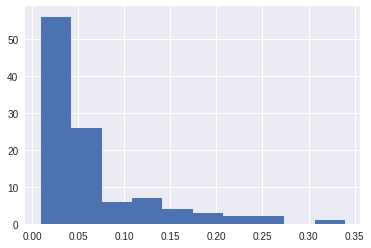

In [9]:
% matplotlib inline

# plot a histogram of degree centrality
plt.hist(list(deg_cen.values()))
plt.show()

**Community detection in Networks**

A network is said to have community structure if the nodes of the network can be easily grouped into (potentially overlapping) sets of nodes such that each set of nodes is densely connected internally.

We will use louvain community detection algorithm to find the modules in our graph.

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


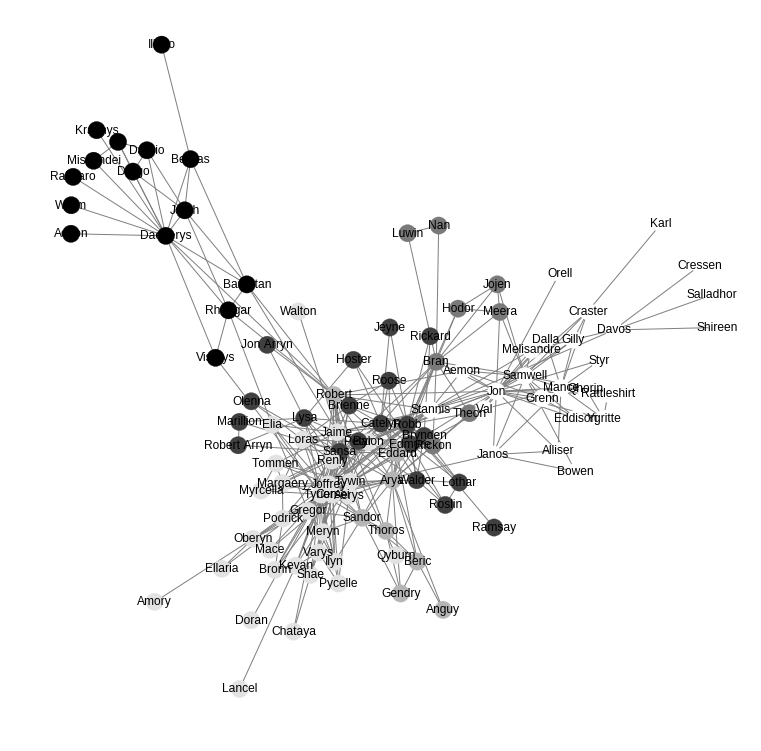

In [16]:
partition = community.best_partition(G) # clustering
pos = nx.spring_layout(G) # positioning

%matplotlib inline

fig = plt.figure(figsize=(10,10))
nx.draw(G, pos, node_color=list(partition.values()), edge_color='grey', with_labels=True); plt.show()